In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc

import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D,MaxPooling2D,LSTM,BatchNormalization,Flatten

from keras.preprocessing.image import img_to_array
from keras.datasets import cifar10
from keras.utils import np_utils,plot_model
from sklearn.model_selection import train_test_split

In [3]:
train_path='./train'
test_path='./test'

In [4]:
AllPath=os.listdir(train_path)

In [5]:
train_X=[]
train_Y=[]

In [6]:
for root,dirs,files in os.walk('./train/'):
    for name in files:
#         print(root)
        img=cv2.imread(os.path.join(root,name))
        res=img_to_array(img)
        del img
        train_X.append(res)
        train_Y.append(root.replace("./train/",""))
        del res
        gc.collect()
#         img=cv2.imread(os.path.join(root,name))
        

x_train=train_X
y_train=train_Y

for i in range(0,len(x_train)):
    x_train[i]=(x_train[i]/255)

In [7]:
train_X = np.array(train_X)
train_Y = np.array(train_Y)

In [8]:
train_Y = pd.get_dummies(train_Y)

In [11]:
train_X

array([[[[219., 205., 203.],
         [234., 220., 201.],
         [247., 217., 216.],
         ...,
         [248., 232., 225.],
         [249., 232., 225.],
         [251., 234., 227.]],

        [[105., 103., 114.],
         [194., 191., 180.],
         [254., 231., 232.],
         ...,
         [254., 248., 243.],
         [252., 247., 242.],
         [250., 247., 241.]],

        [[ 20.,  28.,  54.],
         [120., 128., 126.],
         [243., 228., 229.],
         ...,
         [251., 252., 250.],
         [248., 251., 249.],
         [246., 251., 248.]],

        ...,

        [[ 46.,  66.,  68.],
         [ 29.,  51.,  53.],
         [ 27.,  52.,  53.],
         ...,
         [ 33.,  60.,  68.],
         [ 35.,  60.,  65.],
         [ 41.,  64.,  66.]],

        [[ 47.,  66.,  66.],
         [ 33.,  54.,  53.],
         [ 31.,  54.,  53.],
         ...,
         [ 47.,  71.,  75.],
         [ 53.,  78.,  84.],
         [ 53.,  81.,  87.]],

        [[ 29.,  45.,  42.],
       

In [12]:
x_test=[]
y_test=[]

In [14]:
for root,dirs,files in os.walk('./test/'):
    for name in files:
#         print(root)
        img=cv2.imread(os.path.join(root,name))
        res=img_to_array(img)
        del img
        x_test.append(res)
        y_test.append(root.replace("./test/",""))
        del res
        gc.collect()

x_test=test_X
y_test=test_Y

for i in range(0,len(x_test)):
    x_test[i]=(x_test[i]/255)

In [15]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [16]:
y_test = pd.get_dummies(y_test)

In [17]:
y_test

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,1
9996,0,0,0,0,0,0,0,0,0,1
9997,0,0,0,0,0,0,0,0,0,1
9998,0,0,0,0,0,0,0,0,0,1


for root,dirs,files in os.walk('./train/cat'):
    for name in files:
        img=cv2.imread(os.path.join(root,name))
        #res=cv2.resize(img,(800,800),interpolation=cv2.INTER_LINEAR)
        res=img_to_array(img)
        del img
        train_X.append(res)
        train_Y.append('cat')
        del res
        gc.collect()

train_Y

x_train,x_test,y_train,y_test = train_test_split(train_X,train_Y,test_size=0.2)

for i in range(0,len(x_train)):
    x_train[i]=(x_train[i]/255)

for i in range(0,len(x_test)):
     x_test[i]=(x_test[i]/255)

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

#x_train.shape = np.array(list).shape
#print(x_train.shape)
(np.array(x_train)).shape

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


x_train = test
x_test = x_test.astype('float32')/255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

cifar10.load_data()

In [138]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(Conv2D(filters=16, kernel_size=3, input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='elu', padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='elu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, activation='elu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='elu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='elu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='elu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='elu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
# model.add(Dense(32, activation='elu'))
# model.add(Dense(64, activation='elu'))
model.add(Dense(128, activation='elu'))
# model.add(Dense(64, activation='elu'))
model.add(Dense(256, activation='elu'))
# model.add(Dense(512, activation='elu'))
model.add(Dropout(rate=0.2))
model.add(Dense(10, activation='softmax'))

model.summary();

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_41 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_42 (Batc (None, 16, 16, 32)      

In [139]:
precision=tf.keras.metrics.Precision(name='precision')
recall=tf.keras.metrics.Recall(name='recall')

In [140]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=[precision,recall,'accuracy'])
history = model.fit(train_X,train_Y, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
50000/50000 [==============================] - 8s 163us/sample - loss: 1.3815 - precision: 0.6746 - recall: 0.3533 - acc: 0.5099
Epoch 2/50
50000/50000 [==============================] - 7s 136us/sample - loss: 0.9853 - precision: 0.7684 - recall: 0.5605 - acc: 0.6607
Epoch 3/50
50000/50000 [==============================] - 7s 141us/sample - loss: 0.7934 - precision: 0.8124 - recall: 0.6518 - acc: 0.7279
Epoch 4/50
50000/50000 [==============================] - 7s 140us/sample - loss: 0.6758 - precision: 0.8360 - recall: 0.7083 - acc: 0.7679
Epoch 5/50
50000/50000 [==============================] - 7s 140us/sample - loss: 0.5855 - precision: 0.8574 - recall: 0.7529 - acc: 0.8011
Epoch 6/50
50000/50000 [==============================] - 7s 141us/sample - loss: 0.5112 - precision: 0.8710 - recall: 0.7858 - acc: 0.8257
Epoch 7/50
50000/50000 [==============================] - 7s 139us/sample - loss: 0.4620 - precision: 0.8822 - recall: 0.8090 - acc: 0.8428
Epoch 8/50
50000/500

10000/10000 [==============================] - 2s 202us/sample - loss: 1.4292 - precision: 0.7937 - recall: 0.7619 - acc: 0.7738


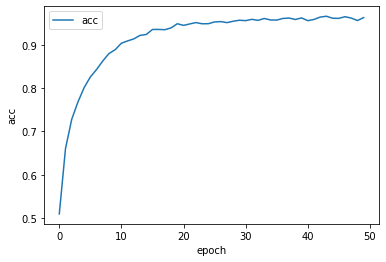

In [141]:
preds = model.evaluate(x = x_test, y = y_test)

plt.plot(history.history['acc'], label='acc')
# plt.plot(history.history['loss'], label='loss')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

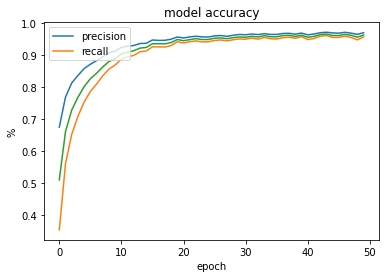

In [142]:
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('%')
plt.xlabel('epoch')
plt.legend(['precision', 'recall'], loc='upper left')
plt.show()

In [143]:
F1 = 2 * (preds[1] * preds[2]) / (preds[1] + preds[2])
print('Precision', preds[1])
print('Recall', preds[2])
print('F1',F1)

Precision 0.79372853
Recall 0.7619
F1 0.7774886321820249
